In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

# Load Data

In [2]:
folder = 'dataset/'
TrainDataset = torch.load(folder + 'dataset16P-P.pt')
#TrainDataset15 = torch.load(folder + 'train_dataset15.pt')

#TestDataset = torch.load(folder + 'test_dataset16.pt')
#TestDataset15 = torch.load(folder + 'test_dataset15.pt')

#UnrelatedDataset = torch.load('unrelated_dataset_rev6.pt')

#adj_matrices14 = torch.load(folder + 'adj_matrices14.pt')
adj_matrices16 = torch.load(folder + 'adj_matrices16.pt')

#adj_matrices2 = torch.load(folder + 'adj_matrices.pt')

#dist_matrices = torch.load(folder + 'dist_matrices.pt')

## Hyperparameters

In [3]:
EPOCHS = 100# 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

#STEPS_PER_EPOCH15 = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times
STEPS_PER_EPOCH16 = int((len(TrainDataset)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [4]:
model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

## Train

In [5]:
model, optimizer, statistics  = Utils.Train(EPOCHS, TrainDataset, model, STEPS_PER_EPOCH16,\
                                   adj_matrices16, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '16PP_model_state_dict.pt')
torch.save(optimizer.state_dict(), '16PP_optimizer_state_dict.pt')
torch.save(statistics, '16PP_training_statistics.pt')

Epoch: 100 - Loss: 0.37 - Total_Time: 57.3 mins: 100%|██████████| 1836/1836 [00:34<00:00, 53.15it/s]


# Plots

In [6]:
#torch.save(model.state_dict(), '16PP_model_state_dict.pt')
#torch.save(optimizer.state_dict(), '16PP_optimizer_state_dict.pt')
#torch.save(statistics, '16PP_training_statistics.pt')

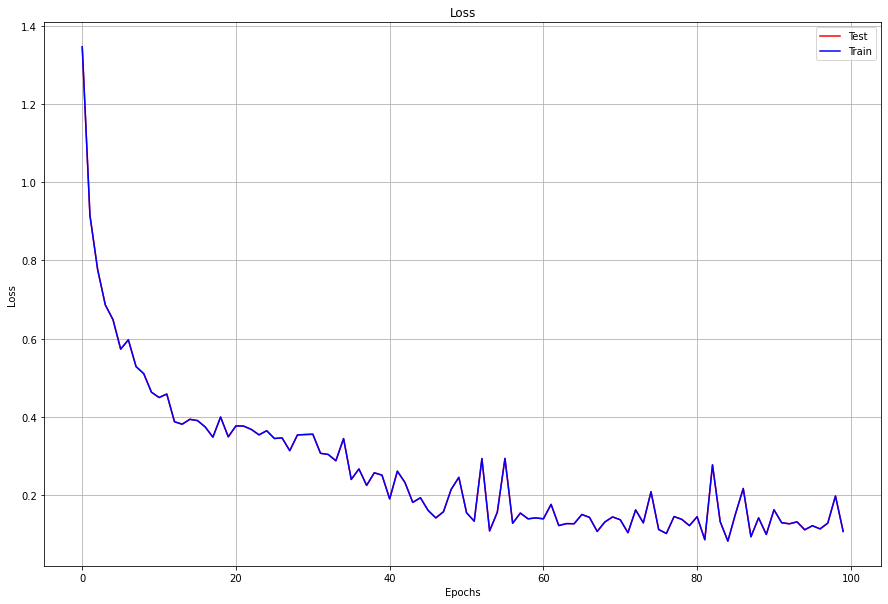

In [7]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics['loss_ls'], statistics['loss_ls'], title)

In [8]:
statistics.keys()

dict_keys(['loss_ls', 'accuracy', 'correct', 'predict'])

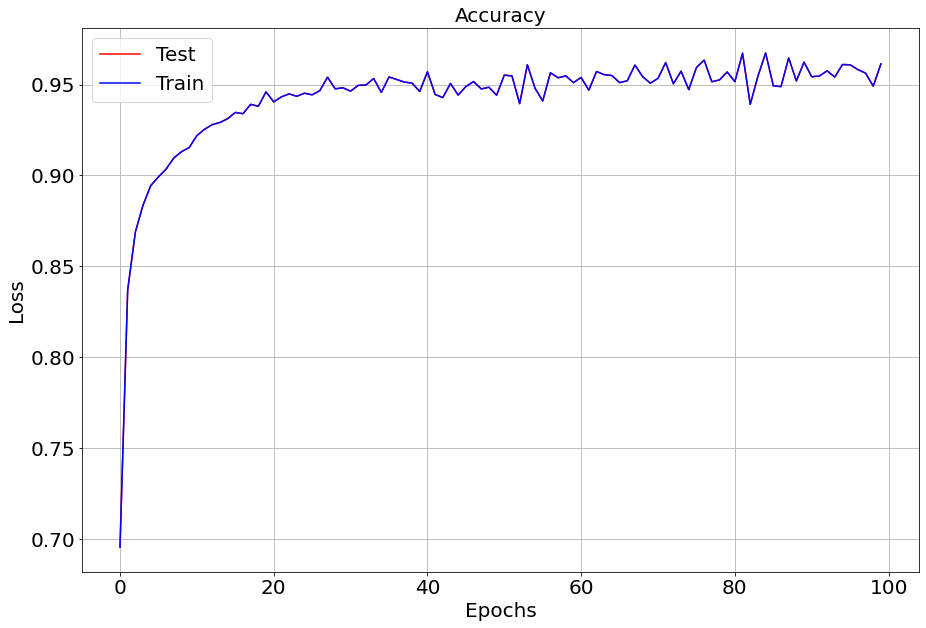

In [9]:
title_Acc = 'Accuracy'
Plot.Plot(statistics['accuracy'], statistics['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.921628  0.147974  0.026785  0.011501  0.011115  0.011138   
1          0.045491  0.831495  0.004640  0.001583  0.000527  0.002350   
2          0.010080  0.004035  0.961952  0.000496  0.000783  0.001144   
3          0.002622  0.001935  0.000695  0.970331  0.002944  0.000087   
4          0.002459  0.000468  0.000369  0.003966  0.975563  0.000170   
5          0.003002  0.002588  0.002115  0.000394  0.000123  0.969975   
6          0.001343  0.004059  0.000698  0.000296  0.000987  0.001262   
7          0.002280  0.005478  0.000327  0.001792  0.000706  0.001507   
8          0.000790  0.000351  0.000175  0.002944  0.000441  0.000056   
9          0.000696  0.000109  0.000255  0.002873  0.000136  0.000019   
10         0.000759  0.000077  0.000246  0.001281  0.001122  0.000022   
11         0.000796  0.

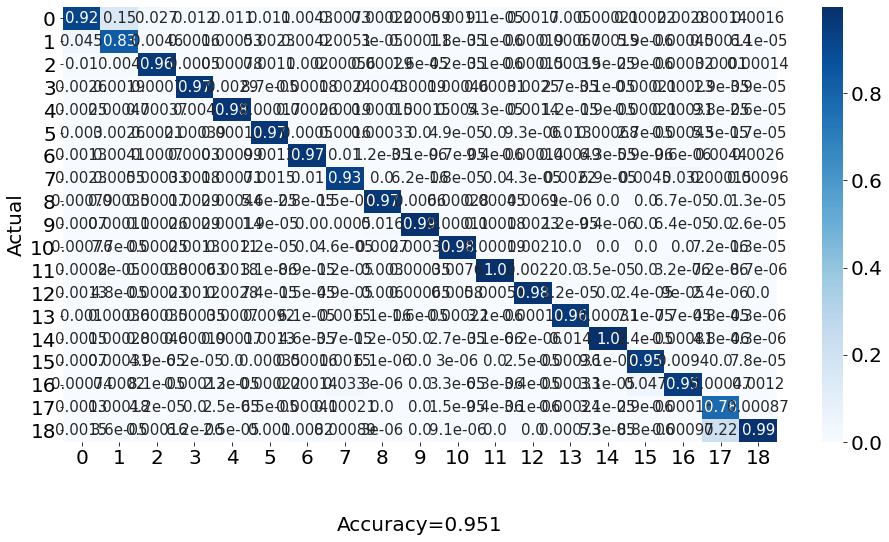

In [10]:
save_name = 'Confusion_Matrix_Train'
color= 'Blues'
folder = 'dataset/'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)